In [11]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from pandas import read_csv
import numpy as np
import os
from math import sqrt

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv('/content/drive/MyDrive/housing.csv', header=None, delimiter=r"\s+", names=column_names)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Splitting the data into training and testing, with 75 percent going to the training.
train = data[0:int(0.75*data.shape[0])]
test = data[int(0.75*data.shape[0]):]

In [5]:
#Finding the correlation between variables.
print(train.corr())

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.191852  0.417774  0.123615  0.468245 -0.180523  0.347863   
ZN      -0.191852  1.000000 -0.490857 -0.092102 -0.475315  0.294601 -0.544065   
INDUS    0.417774 -0.490857  1.000000  0.190293  0.717695 -0.370994  0.577470   
CHAS     0.123615 -0.092102  0.190293  1.000000  0.209865  0.065053  0.168261   
NOX      0.468245 -0.475315  0.717695  0.209865  1.000000 -0.267110  0.691346   
RM      -0.180523  0.294601 -0.370994  0.065053 -0.267110  1.000000 -0.193662   
AGE      0.347863 -0.544065  0.577470  0.168261  0.691346 -0.193662  1.000000   
DIS     -0.375951  0.634942 -0.639572 -0.195237 -0.726566  0.114944 -0.705312   
RAD      0.755205 -0.199432  0.354487  0.237521  0.437444 -0.115433  0.300205   
TAX      0.680976 -0.178582  0.531266  0.160547  0.542279 -0.234659  0.366287   
PTRATIO  0.154295 -0.308668  0.175477 -0.056350 -0.058489 -0.332699  0.102685   
B       -0.196934  0.142178 

<Axes: >

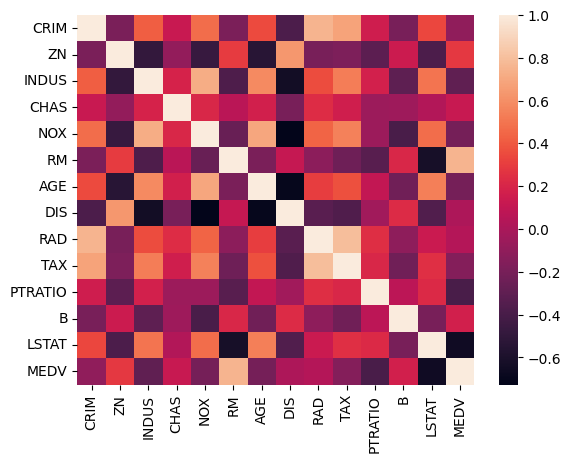

In [6]:
import seaborn as sns
sns.heatmap(train.corr())

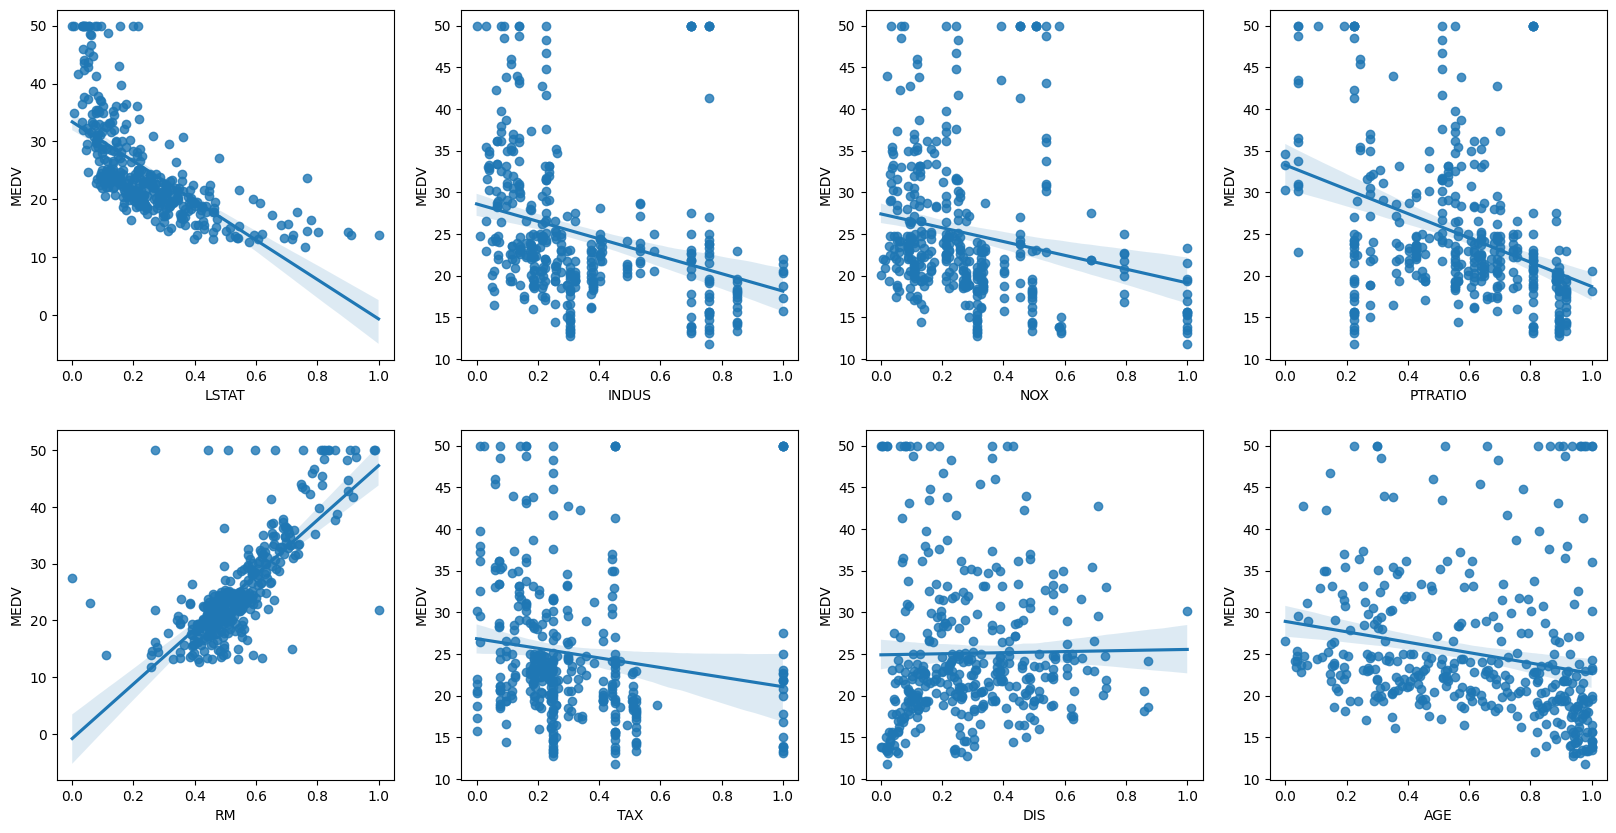

In [7]:
from sklearn import preprocessing
import matplotlib.pyplot as plt

min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = train.loc[:,column_sels]
y = train['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
axs = axs.flatten()

for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])

#Plotting graph between MEDV and different columns to find relationship.

In [8]:
#Transform variable y.
y =  np.log1p(y)
for col in x.columns:
    if np.abs(x[col].skew()) > 0.3:
        x[col] = np.log1p(x[col])

In [9]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

l_regression = linear_model.LinearRegression()
kf = KFold(n_splits=10)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
scores_map = {}
#Prepraring to create models.

In [17]:
#First model, using linear ridge regression.
l_ridge = linear_model.Ridge()
scores = cross_val_score(l_ridge, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['Ridge'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
print("RMSE: " + str(round(sqrt(abs(scores.mean())),3)))

MSE: -0.04 (+/- 0.06)
RMSE: 0.197


In [18]:
#Second model, using polynomial regression with degree = 3.
model = make_pipeline(PolynomialFeatures(degree=3), linear_model.Ridge())
scores = cross_val_score(model, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['PolyRidge'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
print("RMSE: " + str(round(sqrt(abs(scores.mean())),3)))

MSE: -0.03 (+/- 0.04)
RMSE: 0.162


In [20]:
#Preparing to test the models.
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = test.loc[:,column_sels]
y = test['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)

l_regression = linear_model.LinearRegression()
kf = KFold(n_splits=10)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
scores_map = {}

In [23]:
#Transform variable y.
y =  np.log1p(y)
for col in x.columns:
    if np.abs(x[col].skew()) > 0.3:
        x[col] = np.log1p(x[col])

In [24]:
#Testing the first model (linear ridge regression).
l_ridge = linear_model.Ridge()
scores = cross_val_score(l_ridge, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['Ridge'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
print("RMSE: " + str(round(sqrt(abs(scores.mean())),3)))

MSE: -0.06 (+/- 0.06)
RMSE: 0.252


In [25]:
#Testing the second model (polynomial regression with degree = 3)
model = make_pipeline(PolynomialFeatures(degree=3), linear_model.Ridge())
scores = cross_val_score(model, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['PolyRidge'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
print("RMSE: " + str(round(sqrt(abs(scores.mean())),3)))

MSE: -0.06 (+/- 0.06)
RMSE: 0.25


**Summary**

The second model using polynomial regression with a degree of 3 performed better than first model using the linear ridge regression in the testing dataset, with the first model having MSE of -0.4 and RMSE of 0.197, and the second model having MSE of -0.03 and RMSE of 0.162. The second model also had a lower standard deviation of 0.06 compared to 0.04 of the first model. But when we tested the model with the testing datasets, the results were quite similar, with both having the same MSE and standard deviation of -0.06 and 0.06 respectively, but the second model still perfomed a little better with RMSE of 0.25. Therefore, the second model using the polynomial degree 3 regression is the most effective one.